In [1]:
import sys
sys.path.append('..')

from olfactory_navigation import Environment, Agent
from olfactory_navigation.agents import FSVI_Agent
from olfactory_navigation.simulation import run_test, SimulationHistory
from olfactory_navigation.test_setups import run_all_starts_test

from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
import cupy as cp

In [2]:
from cupy.cuda import runtime as cuda_runtime
cuda_runtime.setDevice(0)

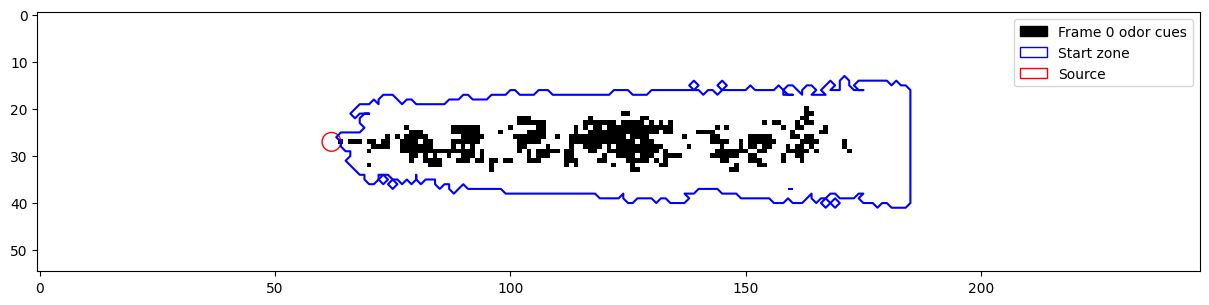

In [3]:
# data_path = "/storage/rando/data/nose_data_27_123.npy" # INSERT YOUR PATH
data_path = "G:\\My Drive\\Documents\\Universita di Genova\\Pimlb work\\nose_data_27_123.npy"

env = Environment(data_file=data_path,
                  data_source_position=[13, 0],
                  source_radius=2,
                  margins=[14, 62],
                  boundary_condition='wrap_vertical',
                  start_zone='odor_present',
                  odor_present_threshold=3e-6)

env.plot()

In [4]:
from olfactory_navigation.agents.model_based_util.environment_converter import minimal_converter

In [5]:
ag = FSVI_Agent(env, environment_converter=minimal_converter, partitions=[5,4])

In [6]:
_ = ag.train(expansions=1000, force=True, use_gpu=True)

[06/18/2024, 12:27:17] MDP_policy, not provided. Solving MDP with Value Iteration...
[06/18/2024, 12:27:17] Sending Model to GPU...
[06/18/2024, 12:27:17]     > Done in 0.860s


  0%|          | 0/1000 [00:00<?, ?it/s]

Summary of Value Iteration run
  - Model: 49-state, 4-action
  - Converged in 903 iterations and 3.3770 seconds
  - Took on average 0.0037s per iteration


Expansions:   0%|          | 0/1000 [00:00<?, ?it/s]

Summary of Point Based Value Iteration run
  - Model: 49 state, 4 action, 3 observations
  - Converged or stopped after 1000 expansion steps and 1000 backup steps.
  - Resulting value function has 6260 alpha vectors.
  - Converged in 55.6245s

  - Expand function took on average 0.0274s and yielded on average 640.81 beliefs per iteration. (0.0005s/it/belief)
  - Backup function took on average 0.0283s and yielded on average 6.26 alpha vectors per iteration. (0.0003s/it/alpha)
  - Pruning function took on average 0.0000s and yielded on average prunings of 0.00 alpha vectors per iteration.


[Warning] 'as_grid' parameter set to False but state count is >3 so it will be plotted as a grid


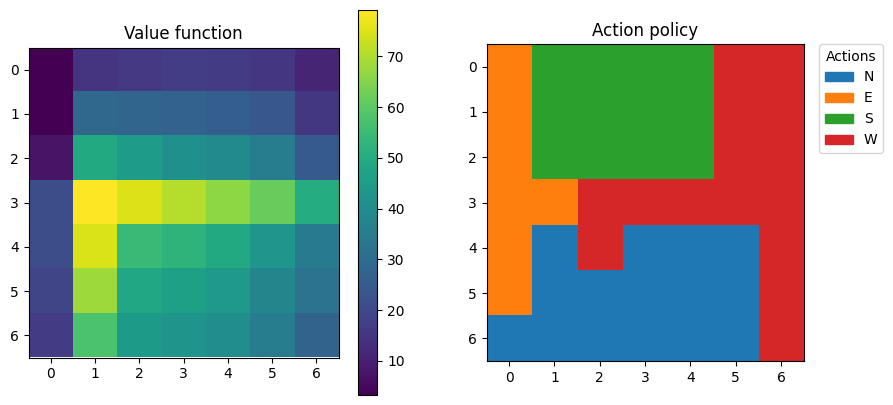

In [7]:
ag.value_function.plot()

In [8]:
hist = run_all_starts_test(ag, use_gpu=True)


  0%|          | 0/1000 [00:00<?, ?it/s]

Simulations done in 18.273s:
Simulations reached goal: 1823/2393 (570 failures (reached horizon: 570)) (76.18% success)
 - Average step count:                 364.057 +- 370.56 (Successfull only: 165.216 +- 119.46)
 - Extra steps:                        293.024 +- 347.91 (Successful only: 106.506 +- 112.95)
 - Average discounted rewards (ADR):   0.224 +- 0.23 (Successfull only: 0.295 +- 0.23)
 - Tmin/T:                             0.391 +- 0.28 (Successful only: 0.479 +- 0.27)


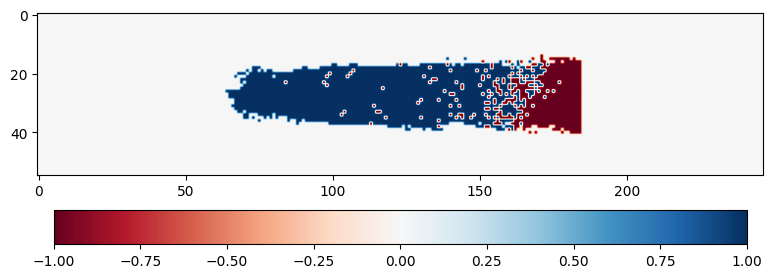

In [9]:
start_points_grid = np.zeros(env.shape)

failed_points = hist.start_points[hist.done_at_step == -1]
success_points = hist.start_points[hist.done_at_step != -1]

start_points_grid[failed_points[:,0], failed_points[:,1]] = -1
start_points_grid[success_points[:,0], success_points[:,1]] = 1

plt.figure(figsize=(10,3))
plt.imshow(start_points_grid, cmap='RdBu')
plt.colorbar(orientation='horizontal')

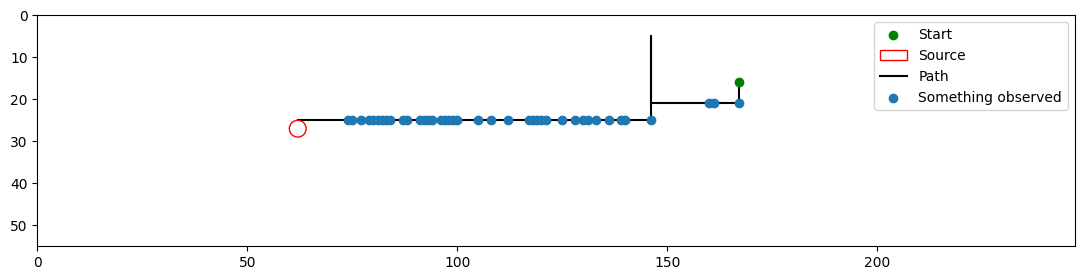

In [26]:
hist.plot(19)